In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [5]:
directory = '/Users/sdeabhi/Desktop/ai/nn/data/PetImages/'
categories = ['cat','dog']

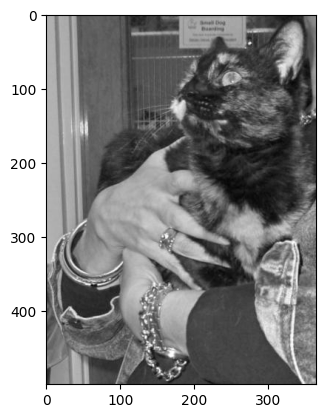

In [16]:
for i in categories:
    path = os.path.join(directory, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [14]:
print(img_array)

[[174 175 177 ... 134 133 132]
 [175 176 178 ... 135 134 132]
 [177 178 179 ... 137 136 134]
 ...
 [ 56  55  58 ... 168 165 174]
 [ 57  56  58 ... 157 150 153]
 [ 58  56  58 ... 156 143 139]]


In [17]:
print(img_array.shape)

(500, 365)


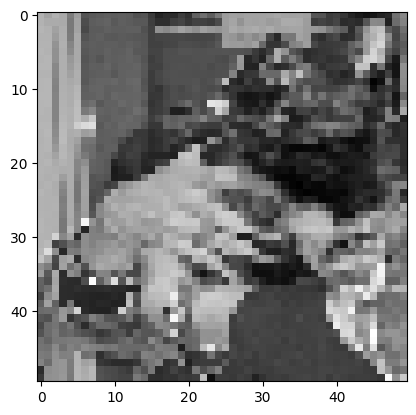

In [23]:
size = 50

new_array = cv2.resize(img_array, (size, size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [29]:
train_data = []
size = 50
data_dir = '/Users/sdeabhi/Desktop/ai/nn/data/PetImages/'
categories = ['cat','dog']

def create_train_data(categories, data_dir, size):
    for i in categories:
        data_class = categories.index(i)
        path = os.path.join(directory, i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (size, size))
                train_data.append([new_array, data_class])
            except Exception as e:
                pass

create_train_data(categories, directory, size)

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


In [30]:
print(len(train_data))

24997


In [31]:
import random

random.shuffle(train_data)

AxesImage(shape=(50, 50)) 1


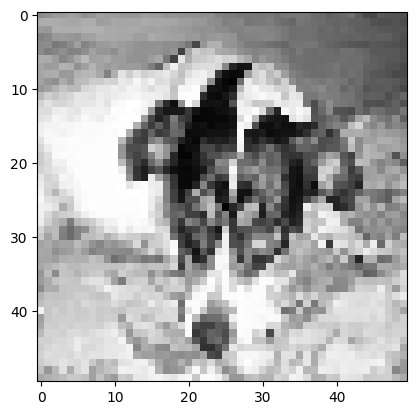

In [38]:
for sample in train_data[:10]:
    print(plt.imshow(sample[0], cmap='gray'), sample[1]) 
    break

In [39]:
x = []
y = []

In [40]:
for features, label in train_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, size, size, 1)    # batch_size, size, size, gray_scale

In [53]:
import pickle

pickle_out = open('data/x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('data/y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# using numpy

# np.save('data/x.npy', x)
# np.save('data/y.npy', y)

# x = np.load('data/x.npy')
# y = np.load('data/y.npy')

In [59]:
pickle_in = open('data/x.pickle', 'rb')
x = pickle.load(pickle_in)

In [60]:
x[1]

array([[[123],
        [147],
        [141],
        ...,
        [118],
        [117],
        [138]],

       [[117],
        [111],
        [117],
        ...,
        [126],
        [124],
        [123]],

       [[142],
        [126],
        [132],
        ...,
        [114],
        [126],
        [123]],

       ...,

       [[115],
        [105],
        [145],
        ...,
        [115],
        [116],
        [107]],

       [[122],
        [100],
        [138],
        ...,
        [121],
        [122],
        [107]],

       [[120],
        [120],
        [126],
        ...,
        [121],
        [145],
        [ 96]]], dtype=uint8)

In [61]:
pickle_in = open('data/y.pickle', 'rb')
y = pickle.load(pickle_in)

In [62]:
y[1]

1